In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('Data/combined_individual_stats_clean.csv')

In [3]:
df.head(5)

,Unnamed: 0,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Alex Abrines,SG,24.0,OKC,75.0,1134.0,9.0,0.567,0.759,...,7.4,12.7,1.3,1.0,2.2,0.094,-0.5,-1.7,-2.2,-0.1
1,1,Quincy Acy,PF,27.0,BRK,70.0,1359.0,8.2,0.525,0.800,...,13.3,14.4,-0.1,1.1,1.0,0.036,-2.0,-0.2,-2.2,-0.1
2,2,Steven Adams,C,24.0,OKC,76.0,2487.0,20.6,0.630,0.003,...,13.3,16.7,6.7,3.0,9.7,0.187,2.2,1.1,3.3,3.3
3,3,Bam Adebayo,C,20.0,MIA,69.0,1368.0,15.7,0.570,0.021,...,13.6,15.9,2.3,1.9,4.2,0.148,-1.6,1.8,0.2,0.8
4,4,Arron Afflalo,SG,32.0,ORL,53.0,682.0,5.8,0.516,0.432,...,10.8,12.5,-0.1,0.2,0.1,0.009,-4.1,-1.8,-5.8,-0.7


In [7]:
df.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

In [10]:
df.head(5)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Alex Abrines,SG,24.0,OKC,75.0,1134.0,9.0,0.567,0.759,0.158,2.5,8.9,5.6,3.4,1.7,0.6,7.4,12.7,1.3,1.0,2.2,0.094,-0.5,-1.7,-2.2,-0.1
1,Quincy Acy,PF,27.0,BRK,70.0,1359.0,8.2,0.525,0.800,0.164,3.1,17.1,10.0,6.0,1.2,1.6,13.3,14.4,-0.1,1.1,1.0,0.036,-2.0,-0.2,-2.2,-0.1
2,Steven Adams,C,24.0,OKC,76.0,2487.0,20.6,0.630,0.003,0.402,16.6,13.9,15.3,5.5,1.8,2.8,13.3,16.7,6.7,3.0,9.7,0.187,2.2,1.1,3.3,3.3
3,Bam Adebayo,C,20.0,MIA,69.0,1368.0,15.7,0.570,0.021,0.526,9.7,21.6,15.6,11.0,1.2,2.5,13.6,15.9,2.3,1.9,4.2,0.148,-1.6,1.8,0.2,0.8
4,Arron Afflalo,SG,32.0,ORL,53.0,682.0,5.8,0.516,0.432,0.160,0.6,10.1,5.3,6.2,0.3,1.1,10.8,12.5,-0.1,0.2,0.1,0.009,-4.1,-1.8,-5.8,-0.7


## Background Info on Variables

- Pos -- Position
- Age -- Age of Player at the start of February 1st of that season.
- Tm -- Team
- G -- Games
- MP -- Minutes Played
- PER -- Player Efficiency Rating: A measure of per-minute production standardized such that the league average is 15.
- TS% -- True Shooting Percentage: A measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws.
- 3PAr -- 3-Point Attempt Rate: Percentage of FG Attempts from 3-Point Range
- FTr -- Free Throw Attempt Rate: Number of FT Attempts Per FG Attempt
- ORB% -- Offensive Rebound Percentage: An estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor.
- DRB% -- Defensive Rebound Percentage: An estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor.
- TRB% -- Total Rebound Percentage: An estimate of the percentage of available rebounds a player grabbed while he was on the floor.
- AST% -- Assist Percentage: An estimate of the percentage of teammate field goals a player assisted while he was on the floor.
- STL% -- Steal Percentage: An estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.
- BLK% -- Block Percentage: An estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor.
- TOV% -- Turnover Percentage: An estimate of turnovers committed per 100 plays.
- USG% -- Usage Percentage: An estimate of the percentage of team plays used by a player while he was on the floor.
- OWS -- Offensive Win Shares: An estimate of the number of wins contributed by a player due to his offense.
- DWS -- Defensive Win Shares: An estimate of the number of wins contributed by a player due to his defense.
- WS -- Win Shares: An estimate of the number of wins contributed by a player.
- WS/48 -- Win Shares Per 48 Minutes: An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)
- OBPM -- Offensive Box Plus/Minus: A box score estimate of the offensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
- DBPM -- Defensive Box Plus/Minus: A box score estimate of the defensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
- BPM -- Box Plus/Minus: A box score estimate of the points per 100 possessions a player contributed above a league-average player, translated to an average team.
- VORP -- Value over Replacement Player: A box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season.

In [40]:
percentages_of_interest = ['PER', 'TS%', 'TRB%', 'AST%', 'TOV%', 'USG%']

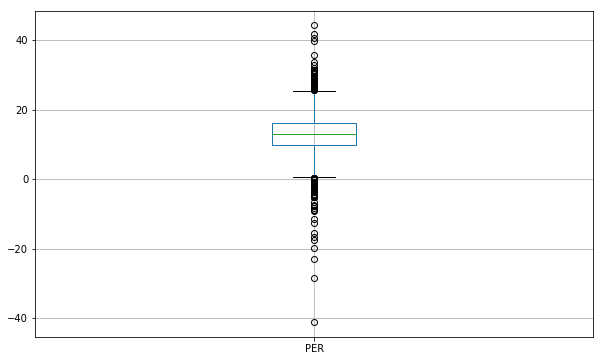

In [46]:
df.boxplot(column = 'PER', figsize = (10, 6));

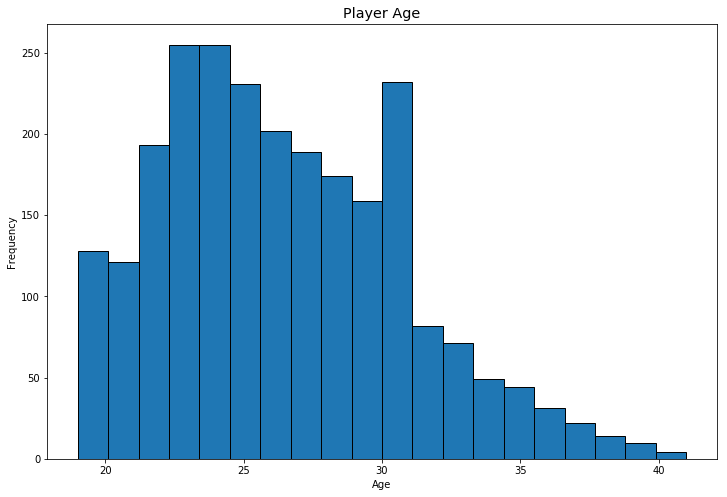

In [14]:
plt.figure(figsize = (12, 8))
df['Age'].plot(kind = 'hist', bins = 20, edgecolor = 'black')
plt.xlabel('Age')
plt.title('Player Age', size = 'x-large');

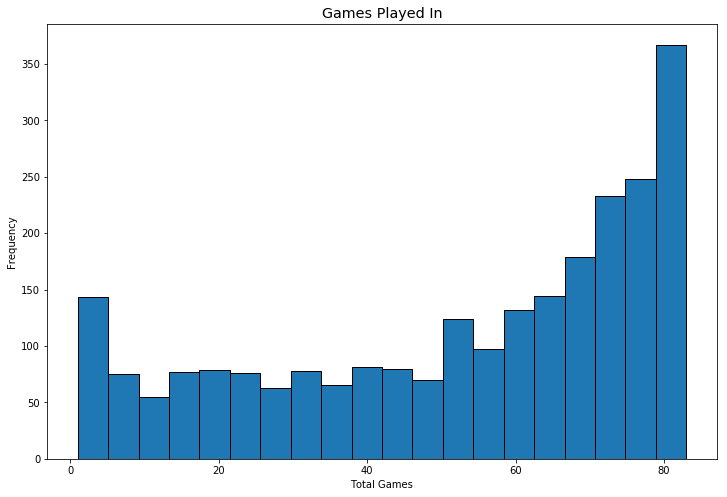

In [18]:
plt.figure(figsize = (12, 8))
df['G'].plot(kind = 'hist', bins = 20, edgecolor = 'black')
plt.xlabel('Total Games')
plt.title('Games Played In', size = 'x-large');

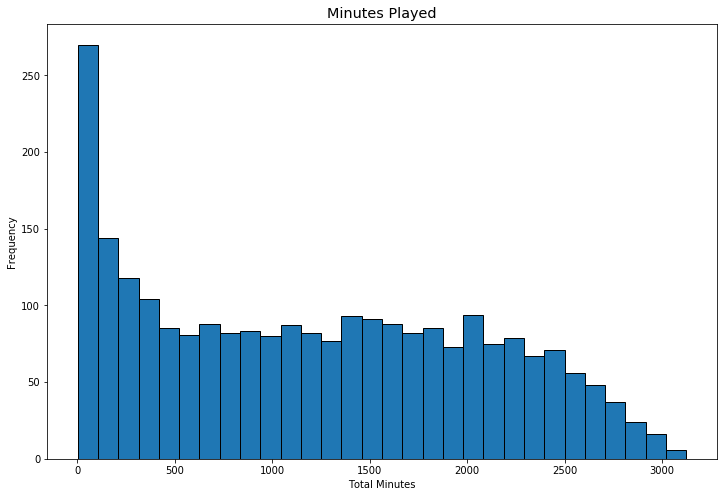

In [19]:
plt.figure(figsize = (12, 8))
df['MP'].plot(kind = 'hist', bins = 30, edgecolor = 'black')
plt.xlabel('Total Minutes')
plt.title('Minutes Played', size = 'x-large');

In [24]:
df.corr()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Age,1.000000,0.071770,0.056035,0.019981,0.082342,0.072773,-0.043085,-0.061952,-0.016884,-0.038838,0.082332,-0.044141,-0.058768,0.033426,-0.071156,0.085011,0.067245,0.085872,0.066808,0.088941,0.035192,0.092529,0.075522
G,0.071770,1.000000,0.871278,0.324046,0.336584,-0.029399,-0.044554,-0.039203,0.078388,0.030000,0.150360,0.009106,0.042466,-0.105135,0.126934,0.506407,0.700591,0.629165,0.295735,0.418132,0.310670,0.507593,0.410255
MP,0.056035,0.871278,1.000000,0.404676,0.311369,-0.019128,-0.008391,-0.085548,0.060397,-0.003788,0.280704,0.053300,-0.013817,-0.126916,0.315024,0.684705,0.804477,0.794857,0.302667,0.494093,0.256840,0.544507,0.627660
PER,0.019981,0.324046,0.404676,1.000000,0.715537,-0.238575,0.147756,0.333705,0.228532,0.331650,0.242521,0.063299,0.256701,-0.195680,0.454625,0.539687,0.439691,0.550002,0.908525,0.863048,0.134863,0.794612,0.492592
TS%,0.082342,0.336584,0.311369,0.715537,1.000000,-0.060142,0.159976,0.108645,0.115452,0.132440,0.025336,-0.112149,0.168420,-0.012181,0.106953,0.388904,0.289205,0.385630,0.742921,0.719875,0.080610,0.646960,0.297253
3PAr,0.072773,-0.029399,-0.019128,-0.238575,-0.060142,1.000000,-0.341582,-0.554735,-0.437200,-0.560783,0.072095,-0.000487,-0.442640,-0.169534,-0.067184,-0.085147,-0.166548,-0.124680,-0.131665,0.128477,-0.355397,-0.069264,-0.056135
FTr,-0.043085,-0.044554,-0.008391,0.147756,0.159976,-0.341582,1.000000,0.269408,0.208415,0.271597,-0.029344,-0.020065,0.165136,0.164151,-0.009749,0.128131,0.071894,0.118224,0.138416,0.021770,0.101853,0.069147,0.112489
ORB%,-0.061952,-0.039203,-0.085548,0.333705,0.108645,-0.554735,0.269408,1.000000,0.439881,0.810403,-0.327572,-0.124197,0.444626,0.024386,-0.023981,0.059492,0.099749,0.080765,0.299216,0.054244,0.160639,0.126144,0.051773
DRB%,-0.016884,0.078388,0.060397,0.228532,0.115452,-0.437200,0.208415,0.439881,1.000000,0.879736,-0.240637,-0.114195,0.476295,0.040168,0.062849,0.148507,0.310060,0.225748,0.141321,-0.112875,0.389857,0.099472,0.198707
TRB%,-0.038838,0.030000,-0.003788,0.331650,0.132440,-0.560783,0.271597,0.810403,0.879736,1.000000,-0.322022,-0.140000,0.532635,0.033412,0.038304,0.130858,0.256949,0.192499,0.257584,-0.037090,0.321021,0.129118,0.161320


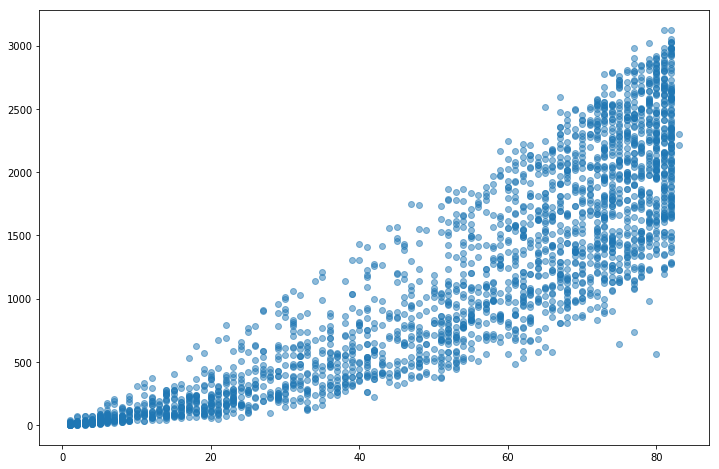

In [28]:
# scatter plot of Games Played and Minutes Played
plt.figure(figsize = (12, 8))
plt.scatter(df['G'], df['MP'], alpha = 0.5);

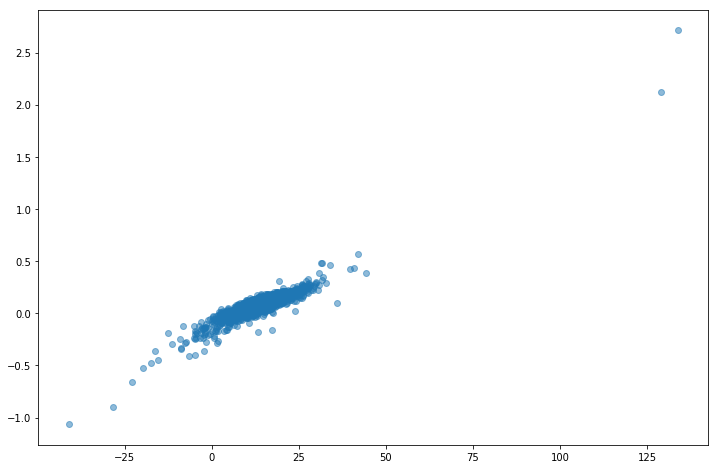

In [31]:
plt.figure(figsize = (12, 8))
plt.scatter(df['PER'], df['WS/48'], alpha = 0.5);

In [32]:
df[df['PER'] > 125]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
341,Naz Mitrou-Long,SG,24.0,UTA,1.0,1.0,133.8,1.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.1,0.0,0.1,2.712,68.6,-14.2,54.4,0.0
2257,DeAndre Liggins,SG,25.0,MIA,1.0,1.0,129.1,1.0,0.0,0.0,100.0,0.0,62.8,0.0,0.0,0.0,0.0,47.8,0.0,0.0,0.0,2.123,47.8,-23.1,24.8,0.0


In [34]:
df.drop(labels = [341, 2257], axis = 0, inplace = True)

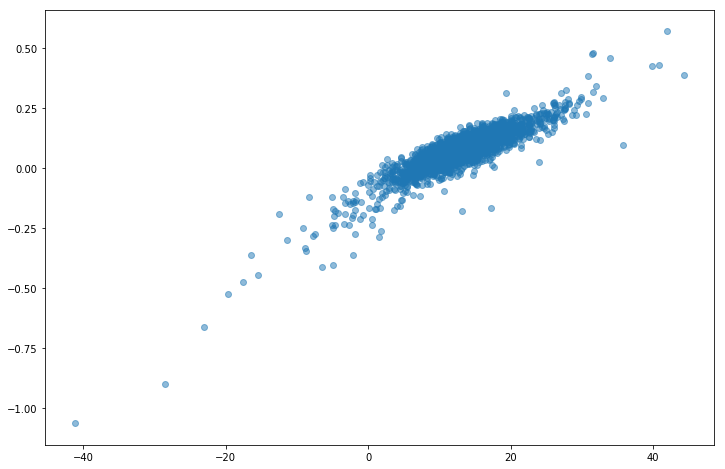

In [35]:
plt.figure(figsize = (12, 8))
plt.scatter(df['PER'], df['WS/48'], alpha = 0.5);